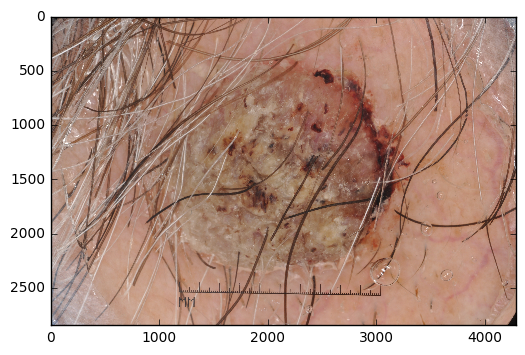

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import pandas as pd
import numpy as np
from skimage.transform import rescale

%matplotlib inline

random_state = 31415
scale = 0.1
#orig_img = imread('../../ISIC-2017_Training_Data/ISIC_0003056.jpg')
#orig_img = imread('../../ISIC-2017_Training_Data/ISIC_0000056.jpg')
orig_img = imread('../../ISIC-2017_Training_Data/ISIC_0013341.jpg')

img_raw = rescale(orig_img, scale, preserve_range=True).astype(np.uint8)
plt.imshow(orig_img)

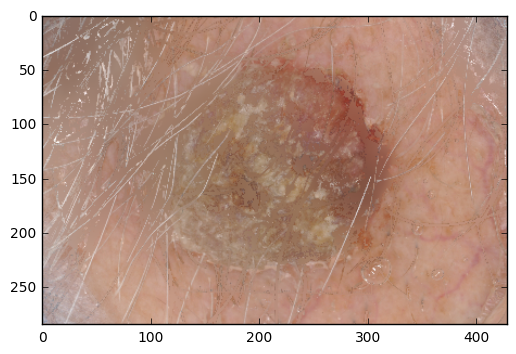

In [2]:
from scipy import ndimage
from skimage.filters.rank import median
from skimage.morphology import disk, black_tophat

mask = disk(30)
img_blurry = img_raw.copy()
img_blurry[:,:,0] = median(img_raw[:,:,0], mask)
img_blurry[:,:,1] = median(img_raw[:,:,1], mask)
img_blurry[:,:,2] = median(img_raw[:,:,2], mask)
img_blurry
plt.imshow(img_blurry)

selem = disk(10)
closed = black_tophat(np.mean(img_raw,2),  selem)
closed

img_new = img_raw.copy()
val = 40
img_new[closed>val] = img_blurry[closed>val]
plt.imshow(img_new)